![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadistica
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [2]:
pip install pandas

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [6]:
# 1. 
beers = pd.read_csv('./datasets_beers.csv')

# 2.
beers.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [23]:
# 3.
beers.columns

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces'], dtype='object')

In [8]:
# 4.
print('nº dimensiones:',beers.ndim) # solo si nos están pidiendo las dimensiones de una array
print('Cuáles son sus dimensiones/tamaño:',beers.shape) # si es de un dataframe, usamos shape para ver el tamaño 
# un DataFrame siempre tiene 2 dimensiones

nº dimensiones: 2
Cuáles son sus dimensiones/tamaño: (2410, 8)


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [29]:
beers = beers.drop(['Unnamed: 0'], axis=1)
beers

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [19]:
beers.shape

(2410, 7)

In [30]:
print('filas:',len(beers))
print('columnas:',len(beers.columns))

filas: 2410
columnas: 7


## Ejercicio 5
¿De qué tipo son los datos?

In [31]:
beers.info() #otra forma de hacerlo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [32]:
beers.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en una nuevo DataFrame un resumen con las principales estadísticas de las columnas numércias: mean, max, count, cuantiles...

In [33]:
beers.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [34]:
len(beers['style'].unique()) #cuenta los valores vacíos NaN

100

In [35]:
beers['style'].nunique() #no cuenta los valores vacíos NaN

99

In [37]:
beers.groupby(['style'])['id'].count()

style
Abbey Single Ale                2
Altbier                        13
American Adjunct Lager         18
American Amber / Red Ale      133
American Amber / Red Lager     29
                             ... 
Tripel                         11
Vienna Lager                   20
Wheat Ale                       1
Winter Warmer                  15
Witbier                        51
Name: id, Length: 99, dtype: int64

In [38]:
beers.groupby(['style'])['id'].count().sort_values(ascending=False).head(20)

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Fruit / Vegetable Beer             49
Kölsch                             42
Hefeweizen                         40
American Pale Lager                39
American Stout                     39
Cider                              37
American Black Ale                 36
German Pilsener                    36
Märzen / Oktoberfest               30
Cream Ale                          29
Name: id, dtype: int64

## Ejercicio 8
1. Imprime por pantalla los registros del 10 al 20
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [39]:
beers[10:21]

,abv,ibu,id,name,style,brewery_id,ounces
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [40]:
beers.loc[10:21,'name':'ounces'] 

,name,style,brewery_id,ounces
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0
19,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [20]:
beers.loc[10:21,['abv','ibu','ounces']] # Si le das los valores de las columnas es necesario []

,abv,ibu,ounces
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0
19,0.082,NaN,12.0


In [41]:
beers.loc[10:21,['abv','ibu','ounces']].to_numpy()

array([[7.2e-02,     nan, 1.2e+01],
       [7.3e-02,     nan, 1.2e+01],
       [6.9e-02,     nan, 1.2e+01],
       [8.5e-02,     nan, 1.2e+01],
       [6.1e-02, 6.0e+01, 1.2e+01],
       [6.0e-02,     nan, 1.2e+01],
       [6.0e-02,     nan, 1.2e+01],
       [6.0e-02,     nan, 1.2e+01],
       [6.0e-02,     nan, 1.2e+01],
       [8.2e-02,     nan, 1.2e+01],
       [8.2e-02,     nan, 1.2e+01],
       [9.9e-02, 9.2e+01, 8.4e+00]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [42]:
beers['ounces'].sum()

32757.3

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [43]:
round(beers['ibu'].mean(),2) # redondea el resultado 

42.71

In [44]:
beers.ibu.agg(['min','max'])

min      4.0
max    138.0
Name: ibu, dtype: float64

In [45]:
beers.iloc[beers.ibu.agg(['idxmin','idxmax'])][['name','ibu']]

,name,ibu
106,Summer Solstice,4.0
147,Bitter Bitch Imperial IPA,138.0


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [48]:
beers.ibu.var()

673.6135373259929

In [107]:
IBU = beers.ibu.fillna(0)
stats.iqr(IBU)

41.0

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico

In [28]:
beers.corr()

,Unnamed: 0,abv,ibu,id,brewery_id,ounces
Unnamed: 0,1.000000,0.006547,0.019885,-0.077488,-0.012088,0.037981
abv,0.006547,1.000000,0.670621,0.042811,-0.098632,0.172529
ibu,0.019885,0.670621,1.000000,0.000485,-0.004875,0.054691
id,-0.077488,0.042811,0.000485,1.000000,-0.504030,0.100843
brewery_id,-0.012088,-0.098632,-0.004875,-0.504030,1.000000,-0.133762
ounces,0.037981,0.172529,0.054691,0.100843,-0.133762,1.000000


<AxesSubplot:xlabel='abv', ylabel='ibu'>

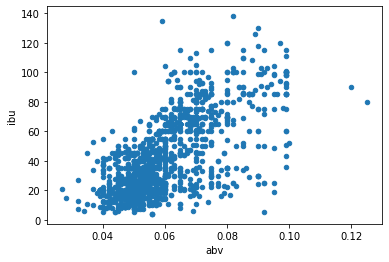

In [49]:
beers.plot.scatter(x='abv', y='ibu')

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

<AxesSubplot:ylabel='Frequency'>

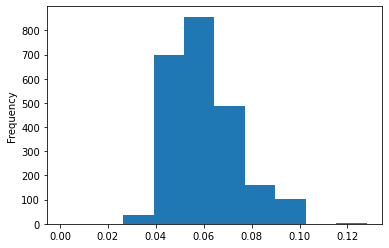

In [56]:
beers.abv.plot.hist()

# distribución asimétrica 

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='abv'>

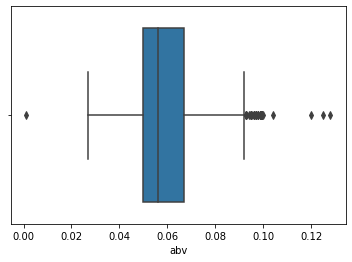

In [59]:
sns.boxplot(beers.abv)

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [62]:
beers.groupby(['style'],as_index=False)['abv'].mean().sort_values(by= ['abv'], ascending = False).head(10)

,style,abv
44,English Barleywine,0.107667
82,Quadrupel (Quad),0.104000
5,American Barleywine,0.099000
15,American Malt Liquor,0.099000
86,Russian Imperial Stout,0.097636
12,American Double / Imperial Stout,0.093667
10,American Double / Imperial IPA,0.087369
94,Tripel,0.086818
25,Baltic Porter,0.085167
30,Belgian Strong Pale Ale,0.084000


In [63]:
beers.groupby(['style'],as_index=False)['ibu'].mean().sort_values(by= ['ibu'], ascending = False).head(10)

,style,ibu
5,American Barleywine,96.000000
10,American Double / Imperial IPA,93.320000
86,Russian Imperial Stout,86.500000
11,American Double / Imperial Pilsner,85.000000
29,Belgian Strong Dark Ale,72.000000
6,American Black Ale,68.900000
13,American IPA,67.634551
44,English Barleywine,66.666667
51,English Stout,66.000000
22,American Strong Ale,65.416667


## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [65]:
breweries = pd.read_csv('./datasets_breweries.csv')
breweries

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [66]:
breweries.info() # recomendable para ver el tipo de datos y que no hay NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [67]:
breweries.rename(columns={'Unnamed: 0':'brewery_id', 'name':'brewery_name'}, inplace=True)
breweries

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [68]:
beers_map = pd.merge(beers,breweries) # otra forma --> beers_map = beers.merge(breweries)
beers_map

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas vervecerías hay?

In [137]:
print('states:',len(beers_map.state.unique()))
print('cities:',len(beers_map.city.unique()))
print('breweries:',len(beers_map.brewery_name.unique()))

states: 51
cities: 384
breweries: 551


## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [72]:
beers_map.groupby(['state','city'])[['abv']].aggregate(['mean', 'median', 'max']) # tb puede simplificarse agg

abv               
                      mean  median    max
state city                               
 AK   Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
 AL   Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
 WI   Wilson      0.055000  0.0550  0.055
 WV   Lewisburg   0.062000  0.0620  0.067
 WY   Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [89]:
# A en 2 pasos
df_indiana = beers_map[beers_map.state.str.contains("IN")]
df_indiana.sort_values(by= ['ibu'], ascending = False).head(10)[['name','ibu','brewery_name','city','state']]

,name,ibu,brewery_name,city,state
479,Hopkick Dropkick,115.0,Burn 'Em Brewing,Michigan City,IN
2191,Overlord Imperial IPA,115.0,Tin Man Brewing Company,Evansville,IN
811,Half Cycle IPA,104.0,Flat 12 Bierwerks,Indianapolis,IN
2062,Isis,91.0,Sun King Brewing Company,Indianapolis,IN
2189,Csar,90.0,Tin Man Brewing Company,Evansville,IN
850,The Gadget,90.0,Four Fathers Brewing,Valparaiso,IN
483,3:33 Black IPA,86.0,Burn 'Em Brewing,Michigan City,IN
1623,Mound Builder IPA,77.0,People's Brewing Company,Lafayette,IN
2047,Grapefruit Jungle (GFJ),77.0,Sun King Brewing Company,Indianapolis,IN
2064,Grapefruit Jungle (GFJ) (2011),77.0,Sun King Brewing Company,Indianapolis,IN


In [90]:
# B en 1 paso, sin almacenar en una variable
beers_map[beers_map.state.str.contains("IN")].sort_values(by= ['ibu'], ascending = False).head(10)[['name','ibu','brewery_name','city','state']]

,name,ibu,brewery_name,city,state
479,Hopkick Dropkick,115.0,Burn 'Em Brewing,Michigan City,IN
2191,Overlord Imperial IPA,115.0,Tin Man Brewing Company,Evansville,IN
811,Half Cycle IPA,104.0,Flat 12 Bierwerks,Indianapolis,IN
2062,Isis,91.0,Sun King Brewing Company,Indianapolis,IN
2189,Csar,90.0,Tin Man Brewing Company,Evansville,IN
850,The Gadget,90.0,Four Fathers Brewing,Valparaiso,IN
483,3:33 Black IPA,86.0,Burn 'Em Brewing,Michigan City,IN
1623,Mound Builder IPA,77.0,People's Brewing Company,Lafayette,IN
2047,Grapefruit Jungle (GFJ),77.0,Sun King Brewing Company,Indianapolis,IN
2064,Grapefruit Jungle (GFJ) (2011),77.0,Sun King Brewing Company,Indianapolis,IN


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [91]:
beers_map.groupby(['city'])[['ibu']].aggregate(['describe'])

ibu                                                       \
               describe                                                        
                  count        mean        std    min     25%    50%     75%   
city                                                                           
Abingdon            1.0  135.000000        NaN  135.0  135.00  135.0  135.00   
Abita Springs       3.0   27.333333  21.455380   13.0   15.00   17.0   34.50   
Ada                 0.0         NaN        NaN    NaN     NaN    NaN     NaN   
Afton               4.0   43.000000  19.899749   22.0   28.00   45.0   60.00   
Airway Heights      0.0         NaN        NaN    NaN     NaN    NaN     NaN   
...                 ...         ...        ...    ...     ...    ...     ...   
Woodinville         4.0   46.750000  18.643587   27.0   39.75   44.0   51.00   
Worcester           1.0   69.000000        NaN   69.0   69.00   69.0   69.00   
Yakima              2.0   54.000000  22.627417   38.0   46.00   54.0   62.00   
Yardley             0.0         NaN        NaN    NaN     NaN    NaN     NaN   
York                4.0   44.250000  22.779742   20.0   35.00   41.0   50.25   

                       
                       
                  max  
city                   
Abingdon        135.0  
Abita Springs    52.0  
Ada               NaN  
Afton            60.0  
Airway Heights    NaN  
...               ...  
Woodinville      72.0  
Worcester        69.0  
Yakima           70.0  
Yardley           NaN  
York             75.0  

[384 rows x 8 columns]

## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías el mínimo nivel de `abv` sea de 0.07.

In [122]:
filter_min = beers_map.groupby('brewery_name')['abv'].min().to_frame()
filter_min

,abv
brewery_name,
10 Barrel Brewing Company,0.050
18th Street Brewery,0.045
2 Towns Ciderhouse,0.060
21st Amendment Brewery,0.044
3 Daughters Brewing,0.050
...,...
Woodchuck Hard Cider,0.050
"Woodstock Inn, Station & Brewery",0.028
Wormtown Brewery,0.065


In [124]:
filter_min[filter_min.abv > 0.07]

,abv
brewery_name,
Beach Brewing Company,0.088
Black Acre Brewing Co.,0.072
Blue Hills Brewery,0.080
Borderlands Brewing Company,0.071
Christian Moerlein Brewing Company,0.089
Daredevil Brewing Company,0.072
Kalona Brewing Company,0.071
Kulshan Brewery,0.080
Mountain Town Brewing Company,0.082


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [133]:
ibu_mean = beers.ibu.mean()
states_ibu_mean = beers_map.groupby('state')['ibu'].mean().to_frame()
states_ibu_mean[states_ibu_mean['ibu'] > ibu_mean].sort_values(['ibu'], ascending=False)

,ibu
state,
WV,57.500000
NM,57.000000
DC,55.250000
ID,55.117647
ME,52.857143
DE,52.000000
AL,51.222222
MN,49.956522
NH,48.500000
